In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
from sklearn.model_selection import train_test_split
import time
from sklearn.linear_model import LinearRegression

In [139]:
def generate_dataset(m,random,coeffs,noise):
    
    np.random.seed(random)
    n = len(coeffs)
    X = np.ones((m,1))
#     X = np.array([])
    y = np.zeros((m,1))
    labels = ['ones']+['X'+str(i+1) for i in range(n)]
    
    print(f"y = ",end='')
    for i in range(n):
#         low,high = np.sort(np.random.randint(-5000,5000,2))
        low,high = -500,500
#         print(low,high)
        x = np.random.uniform(low,high,m).reshape(-1,1)
        X = np.hstack((X,x))
        
        for deg,coef in enumerate(coeffs[i]):
            y += coef*(x**deg)
            print(f" ({coef}X{i}^{deg}) +",end='')
    
    y += np.random.rand(m,1)*noise
    DF = pd.DataFrame(X)
    DF.columns = labels
    DF = DF.drop('ones',axis=1)
    
    return DF,y       

In [140]:
def scatter(X,y):
    
    n = X.shape[1]
    for i in range(n):
        plt.scatter(X[:,i],y)
        plt.xlabel('X'+str(i))
        plt.ylabel('y')
        plt.show()
        plt.close()

In [141]:
coeffs = [[6,15,83,-1]]

degree = -1
for i in coeffs:
    if len(i)>degree:
        degree = len(i)
degree -= 1

m = 800
random_seed = 12
noise = 6000

# X,y = 
X,y = generate_dataset(m,random_seed,coeffs,noise)
X.head()

y =  (6X0^0) + (15X0^1) + (83X0^2) + (-1X0^3) +

,X1
0,-345.837158
1,240.049697
2,-236.684985
3,33.739393
4,-485.425038


In [142]:
degree

3

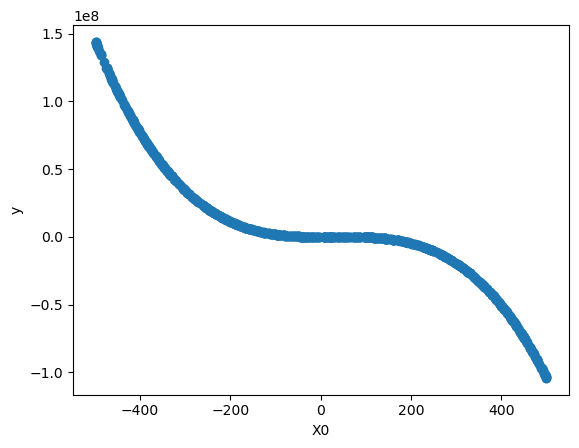

In [143]:
scatter(X.values,y)

In [144]:
def h(X,theta):
#   (m,pn) @ (pn,1) => (m,1)  
    return X@theta

In [145]:
def j(X,y,theta):
    m = X.shape[0]
    temp1 = (h(X,theta) - y)**2
    temp1 = temp1.mean()[0]
    return temp1

In [146]:
# G is function to update the value of theta/parameters of model 
def G(X,y,theta,alpha,lambda_):
#     alpha is learning rate
#     lambda_ is ridge regularisation constant
    
    t = abs(theta)
    m,pn = X.shape
    c = alpha/m
    temp1 = X.transpose() # (pn,m)
#     h is function to get prediction
    temp2 = (h(X,theta) - y) # (m,1)
    temp3 = temp1 @ temp2 # (pn,1)
    theta = theta - (temp3*c)
    theta[1:] -= (lambda_/m)*t[1:] 
    
    return theta

In [147]:
def normalise(X):
    X.iloc[:,1:] = (X.iloc[:,1:] - X.iloc[:,1:].mean()) / X.iloc[:,1:].std()
    return X

In [148]:
def preprocess(X,y):
    
    # split
    X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=104,train_size=0.8, shuffle=True)     
    X_train, X_test, y_train,y_test = X_train.reset_index(), X_test.reset_index(), y_train,y_test
    X_train, X_test = X_train.drop('index',axis=1),X_test.drop('index',axis=1)
    
    # poly
    poly = PolynomialFeatures(degree)
    cols = X.columns
    X_train_p = poly.fit_transform(X_train)
    X_test_p = poly.fit_transform(X_test)
    
    cols = poly.get_feature_names_out(cols) 
    X_train_p = pd.DataFrame(X_train_p,columns=cols)
    X_test_p = pd.DataFrame(X_test_p,columns=cols)
    
    # normalise
    X_train_p, X_test_p ,X_test = normalise(X_train_p),normalise(X_test_p),normalise(X_test)
    
    return X_train_p, X_test_p,X_test, y_train,y_test

In [149]:
def GD(X ,y ,thresh ,max_iter ,alpha ,lambda_):
    
    m,n = X.shape
    X, X_test_p,X_test, y,y_test = preprocess(X,y)
    pn = X.shape[1]    
    
    start_time = time.time()
    
    theta = np.random.rand(pn,1)
    costs = [j(X,y,theta)]
    iter_ = 0
    cost_diff = 1
    test_c = [j(X_test_p,y_test,theta)]
    
#     while cost_diff >= thresh:
    while iter_ <= max_iter:
        
        cur = j(X,y,theta)
        
        theta = G(X,y,theta,alpha,lambda_)
        after = j(X,y,theta)
        
        cost_diff = cur - after
        iter_ += 1
        
        test_c.append(j(X_test_p,y_test,theta))
        costs.append(after)
        
    print(f"Cost Diff {cost_diff}")
    end_time = time.time()
    print(f"Execution time {end_time - start_time} Seconds.")
    
    my_test_preds = h(X_test_p,theta)
    
    start_time = time.time()
    model = LinearRegression()
    model.fit(X,y)
    end_time = time.time()
    print(f"Execution time {end_time - start_time} Seconds.")
    
    sklearn_test_preds = model.predict(X_test_p) 
    model_theta = (model.intercept_ + model.coef_).reshape(-1,1)
    sklearn_cost = j(X_test_p,y_test,model_theta)
    print(f"My final Cost {costs[-1]}")
    print(f"Sklearn Cost {sklearn_cost}.")
    
    plt.plot(costs)
    plt.show()
    plt.close()
    
    plt.scatter(X_test,y_test,c='b')
    plt.scatter(X_test,my_test_preds,c='r')
    plt.title(f"My predictions - ridge - lambda:{lambda_} - alpha:{alpha}.")
    plt.show()
    plt.close()
    
    plt.scatter(X_test,y_test,c='b')
    plt.scatter(X_test,sklearn_test_preds,c='r')
    plt.title("Sklearn Predictions")
    plt.show()
    plt.close()

    return theta

Cost Diff -9820126499.421875
Execution time 56.24383568763733 Seconds.
Execution time 0.0043048858642578125 Seconds.
My final Cost 23311507826053.992
Sklearn Cost 124529021281160.84.


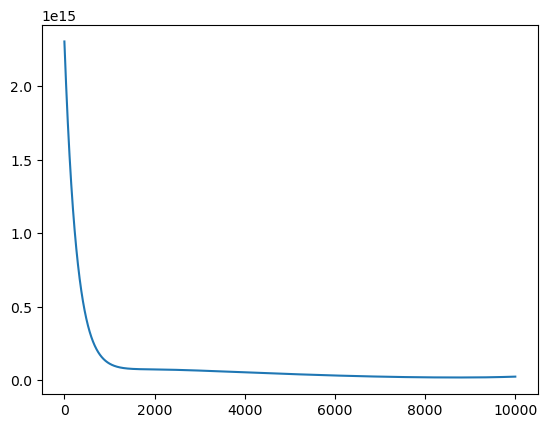

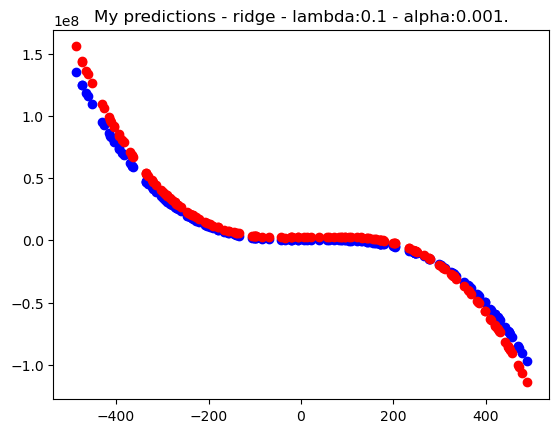

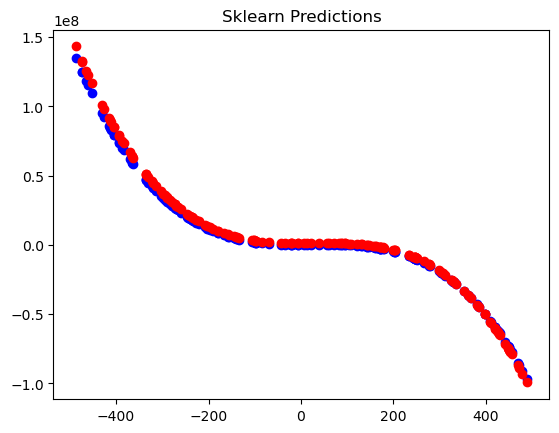

In [162]:
thresh = 0.1
alpha = 1e-3
lambda_ = 0.1
max_iter = 10000

theta = GD(X ,y ,thresh ,max_iter ,alpha ,lambda_)

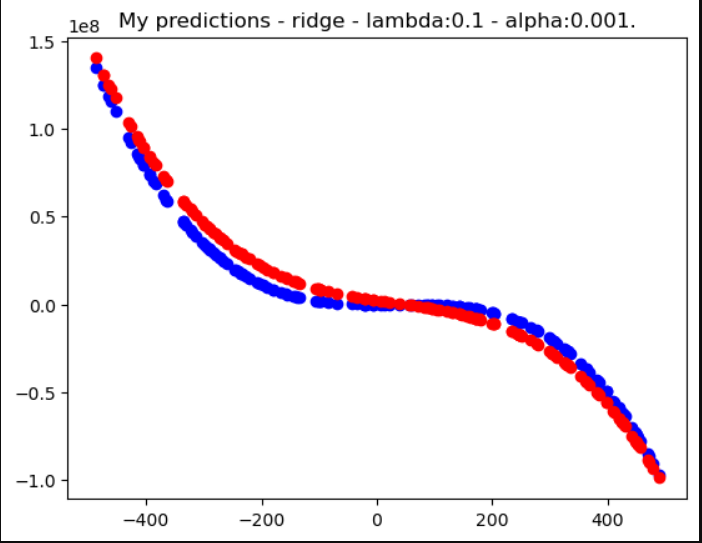

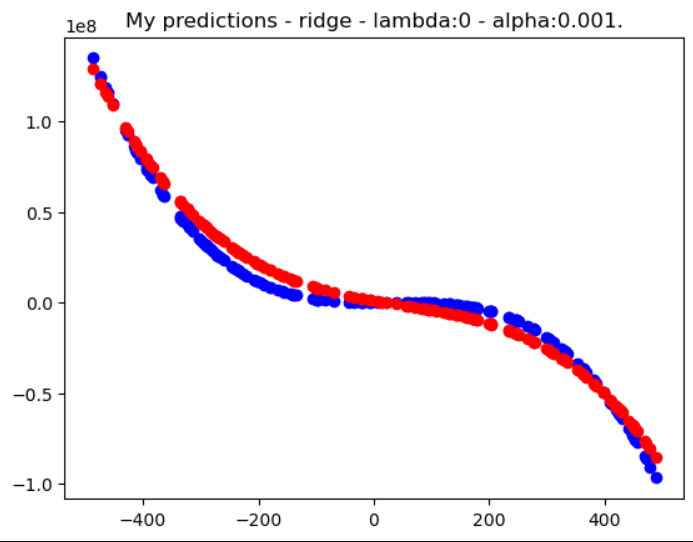